In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
id_cols = ['PUF_CASE_ID', 'YEAR_OF_DIAGNOSIS', 'CLASS_OF_CASE']

fac_cols = [ 'PUF_FACILITY_ID', 'FACILITY_TYPE_CD', 'FACILITY_LOCATION_CD']

dem_cols = ['AGE', 'SEX', 'RACE', 'SPANISH_HISPANIC_ORIGIN']

ses_cols = ['INSURANCE_STATUS', 'UR_CD_13', 'CROWFLY', 'NO_HSD_QUAR_2016', 'MED_INC_QUAR_2016', 'PUF_MEDICAID_EXPN_CODE']
 
medco_cols = ['CDCC_TOTAL_BEST']

tumor_cols = ['HISTOLOGY', 'GRADE', 'GRADE_CLIN', 'TUMOR_SIZE', 'TUMOR_SIZE_SUMMARY_2016', 'TNM_CLIN_T', 'TNM_CLIN_N', 'TNM_CLIN_M', 'TNM_CLIN_STAGE_GROUP', 'TNM_PATH_T', 'TNM_PATH_N', 'TNM_PATH_M', 'TNM_PATH_STAGE_GROUP', 'AJCC_TNM_CLIN_T', 'AJCC_TNM_CLIN_N', 'AJCC_TNM_CLIN_M', 'AJCC_TNM_CLIN_STG_GRP', 'AJCC_TNM_PATH_T', 'AJCC_TNM_PATH_N', 'AJCC_TNM_PATH_M', 'AJCC_TNM_PATH_STG_GRP', 'AJCC_TNM_POST_PATH_T',  'AJCC_TNM_POST_PATH_N', 'AJCC_TNM_POST_PATH_M', 'AJCC_TNM_POST_PATH_STG_GRP', 'LYMPH_VASCULAR_INVASION',]

rad_cols = ['RAD_LOCATION_OF_RX','DX_RAD_STARTED_DAYS', 'RAD_ELAPSED_RX_DAYS', 'REASON_FOR_NO_RADIATION', 'TOTAL_DOSE',]

chemo_cols = ['RX_SUMM_CHEMO', 'DX_CHEMO_STARTED_DAYS', 'RX_SUMM_SYSTEMIC_SUR_SEQ']

surg_cols = ['RX_SUMM_SURGRAD_SEQ', 'PALLIATIVE_CARE', 'DX_SURG_STARTED_DAYS', 'RX_SUMM_SURG_PRIM_SITE', 'RX_SUMM_SURGICAL_MARGINS','SURG_DISCHARGE_DAYS', 'READM_HOSP_30_DAYS', 'REASON_FOR_NO_SURGERY', ]

os_cols = ['DX_LASTCONTACT_DEATH_MONTHS', 'PUF_VITAL_STATUS',]
 
incl = id_cols + fac_cols + dem_cols + ses_cols + medco_cols + tumor_cols + rad_cols + chemo_cols + surg_cols + os_cols

In [225]:
data = pd.read_csv('data/ascc.csv', usecols=incl, na_values=[999, 99], low_memory=False)
data.shape

(85027, 61)

In [226]:
data = data[data['CLASS_OF_CASE'] != 0]
data.drop('CLASS_OF_CASE', axis=1, inplace=True)

In [227]:
#define a function that returns value counts and value percentages for a given column
def table(df, col):
    return pd.concat([df[col].value_counts(), df[col].value_counts(normalize=True)], axis=1, keys=('counts', 'percent'))
def perc_APR(df):
    return table(df, 'APR')['percent'][1]

In [228]:
#create a dataframe with the counts and percentages of a variable by year
def by_year(df, col):
    cts = pd.crosstab(df['YEAR_OF_DIAGNOSIS'], df[col])
    percs = pd.crosstab(df['YEAR_OF_DIAGNOSIS'], df[col], normalize='index')
    percs = percs.round(2) * 100
    percs = percs.astype(str)
    cts = cts.astype(str)
    comb = cts + ' (' + percs + '%)'
    comb['total'] = df['YEAR_OF_DIAGNOSIS'].value_counts().sort_index()
    return comb
def by_stage(df, col):
    cts = pd.crosstab(df['stage'], df[col])
    percs = pd.crosstab(df['stage'], df[col], normalize='index')
    percs = percs.round(2) * 100
    percs = percs.astype(str)
    cts = cts.astype(str)
    comb = cts + ' (' + percs + '%)'
    comb['total'] = df['stage'].value_counts().sort_index()
    return comb

<h1> First, define the primary outcome 'APR' <h1>
<h3> APR 1 is codes 60-63, APR 0 requires 1 year of follow-up, no palliative care, surgery 'not planned' <h3>

In [229]:
data['APR'] = np.NaN
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 60, 'APR'] = 1
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 61, 'APR'] = 1
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 62, 'APR'] = 1
data.loc[data['RX_SUMM_SURG_PRIM_SITE'] == 63, 'APR'] = 1

data.loc[data['APR'] != 1, 'APR'] = 0

data['APR'].value_counts(dropna=False)

0.0    74926
1.0     5202
Name: APR, dtype: int64

In [230]:
table(data, 'APR')

,counts,percent
0.0,74926,0.935079
1.0,5202,0.064921


In [231]:
pd.crosstab(data['HISTOLOGY'], data['APR'], margins=True, dropna=False).sort_values(by=1, ascending=False).head(10)

APR,0.0,1.0,All
HISTOLOGY,,,
All,74926,5202,80128
8070,51163,1905,53068
8140,3220,1587,4807
8480,470,389,859
8071,4734,296,5030
8720,741,230,971
8083,3753,123,3876
8263,308,57,365
8210,283,56,339


In [232]:
pd.crosstab(data['HISTOLOGY'], data['APR'], margins=True, dropna=False).sort_values(by=1, ascending=False).iloc[10:20]

APR,0.0,1.0,All
HISTOLOGY,,,
8255,57,46,103
8490,104,46,150
8481,72,44,116
8246,242,35,277
8560,115,32,147
8051,373,28,401
8124,1268,26,1294
8261,130,25,155
8721,97,23,120


In [233]:
pd.crosstab(data['HISTOLOGY'], data['APR'], margins=True, dropna=False).sort_values(by=1, ascending=False).iloc[20:30]

APR,0.0,1.0,All
HISTOLOGY,,,
8123,574,20,594
8542,177,17,194
8010,1399,16,1415
8041,294,15,309
8574,16,13,29
8746,41,7,48
8077,2284,6,2290
8244,9,6,15
8240,91,6,97


In [234]:
histo_tsikitis = [8000, 8010, 8083, 8120, 8124, 8560, 8070, 8071, 8072, 8076, 8083, 8481, 8051, 8123, 8480]


In [235]:
for i in range(8051, 8052):
    print(i)

8051


In [236]:
#create a list of numbers between 8070 and 8078
histo_list = []
for i in range(8051, 8085):
    histo_list.append(i)
for i in range(8120, 8132):
    histo_list.append(i)
#add the codes in histo_tiskitis to the list, unless they are already in the list
for x in histo_tsikitis:
    if x not in histo_list:
        histo_list.append(x)

histo_list

[8051,
 8052,
 8053,
 8054,
 8055,
 8056,
 8057,
 8058,
 8059,
 8060,
 8061,
 8062,
 8063,
 8064,
 8065,
 8066,
 8067,
 8068,
 8069,
 8070,
 8071,
 8072,
 8073,
 8074,
 8075,
 8076,
 8077,
 8078,
 8079,
 8080,
 8081,
 8082,
 8083,
 8084,
 8120,
 8121,
 8122,
 8123,
 8124,
 8125,
 8126,
 8127,
 8128,
 8129,
 8130,
 8131,
 8000,
 8010,
 8560,
 8481,
 8480]

In [237]:
drop_counts = pd.DataFrame(columns=['criteria', 'before', 'after', 'drop', '% APR'])
drop_counts.head()

,criteria,before,after,drop,% APR


In [238]:
drop_counts = drop_counts.append({'criteria': 'total', 'before': 0, 'after': data.shape[0], 'drop': 0, '% APR': table(data, 'APR')['percent'][1]}, ignore_index=True)

In [239]:
#keep only histologies in the list
before = data.shape[0]
data = data[data['HISTOLOGY'].isin(histo_list)]
after = data.shape[0]
drop = before - after
drop_counts = drop_counts.append({'criteria': 'histology', 'before': before, 'after': after, 'drop': drop, '% APR': table(data, 'APR')['percent'][1]}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.064921
1,histology,80128,71606,8522,0.041156


In [240]:
table(data, 'APR')

,counts,percent
0.0,68659,0.958844
1.0,2947,0.041156


In [163]:
data['REASON_FOR_NO_RADIATION'].value_counts(dropna=False)

0    52358
1    15956
9     1273
7      806
2      471
8      277
6      228
5      100
Name: REASON_FOR_NO_RADIATION, dtype: int64

In [164]:
data['RX_SUMM_CHEMO'].value_counts()

3.0     42561
0.0     16827
2.0      5815
1.0      2778
87.0     1239
82.0      939
88.0      636
86.0      211
85.0      138
Name: RX_SUMM_CHEMO, dtype: int64

In [165]:
data['CRT'] = np.NaN
data.loc[(data['REASON_FOR_NO_RADIATION'] == 0) & (data['RX_SUMM_CHEMO'] == 3), 'CRT'] = 1
data.loc[data['CRT'] != 1, 'CRT'] = 0
data['CRT'].value_counts()

1.0    40915
0.0    30554
Name: CRT, dtype: int64

In [166]:
pd.crosstab(data['CRT'], data['APR'], margins=True, dropna=False)

APR,0.0,1.0,All
CRT,,,
0.0,28662,1892,30554
1.0,39864,1051,40915
All,68526,2943,71469


In [167]:
pd.crosstab(data['CRT'], data['APR'], normalize='index', dropna=False)

APR,0.0,1.0
CRT,,
0.0,0.938077,0.061923
1.0,0.974313,0.025687


In [168]:
data['TOTAL_DOSE'].describe()

count     31764.000000
mean      24243.443112
std      143174.712634
min           0.000000
25%           0.000000
50%        4590.000000
75%        5400.000000
max      999999.000000
Name: TOTAL_DOSE, dtype: float64

<AxesSubplot:>

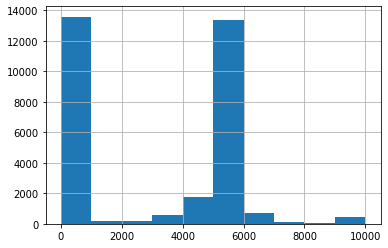

In [169]:
data.loc[data['TOTAL_DOSE'] > 20000, 'TOTAL_DOSE'] = np.NaN
data.loc[data['TOTAL_DOSE'] > 10000, 'TOTAL_DOSE'] = 10000
data['TOTAL_DOSE'].hist()

In [170]:
data['Radiation Dose, >30 Gy'] = np.NaN
data.loc[data['TOTAL_DOSE'] >= 3000, 'Radiation Dose, >30 Gy'] = 1
data.loc[data['TOTAL_DOSE'] < 3000, 'Radiation Dose, >30 Gy'] = 0

data['Radiation Dose, >30 Gy'].value_counts(dropna=False)


NaN    40467
1.0    17052
0.0    13950
Name: Radiation Dose, >30 Gy, dtype: int64

In [171]:
data_rad = data[data['Radiation Dose, >30 Gy'] == 1]
table(data_rad, 'APR')


,counts,percent
0.0,16634,0.975487
1.0,418,0.024513


In [172]:
pd.crosstab(data['APR'], data['Radiation Dose, >30 Gy'], margins=True, dropna=False, normalize=True)

"Radiation Dose, >30 Gy",0.0,1.0,All
APR,,,
0.0,0.425973,0.536546,0.958821
1.0,0.023998,0.013483,0.041179
All,0.449971,0.550029,1.000000


In [173]:
data['stage'] = np.NaN

In [174]:
'TNM_CLIN_T', 'TNM_CLIN_N', 'TNM_CLIN_M',
'TNM_CLIN_T', 'TNM_CLIN_N', 'TNM_CLIN_M', 'TNM_CLIN_STAGE_GROUP',
'AJCC_TNM_CLIN_M', 'AJCC_TNM_CLIN_N', 'AJCC_TNM_CLIN_N_SFX', 'AJCC_TNM_CLIN_STG_GRP', 'AJCC_TNM_CLIN_T',

('AJCC_TNM_CLIN_M',
 'AJCC_TNM_CLIN_N',
 'AJCC_TNM_CLIN_N_SFX',
 'AJCC_TNM_CLIN_STG_GRP',
 'AJCC_TNM_CLIN_T')

In [175]:
#if YEAR_OF_DIAGNOSIS is < 2018, stage is 'AJCC Clinical Stage Group'
data['stage'] = data['AJCC_TNM_CLIN_STG_GRP']
data.loc[data['YEAR_OF_DIAGNOSIS'] < 2018, 'stage'] = data.loc[data['YEAR_OF_DIAGNOSIS'] < 2018, 'TNM_CLIN_STAGE_GROUP']
#if 'stage' is still NaN, then fill with 'AJCC Clinical Stage Group'
data.loc[data['stage'].isnull(), 'stage'] = data.loc[data['stage'].isnull(), 'TNM_CLIN_STAGE_GROUP']
#find rows where 'stage' does not equal 'TNM_CLIN_STAGE_GROUP' and show only those columns
data.loc[(data['stage'] != data['TNM_CLIN_STAGE_GROUP']) & (data['stage'].notnull() & (data['TNM_CLIN_STAGE_GROUP'].notnull())), ['stage', 'TNM_CLIN_STAGE_GROUP']]
#find rows where 'stage' does not equal 'TNM_CLIN_STAGE_GROUP' and show only those columns
data.loc[(data['stage'] != data['TNM_CLIN_STAGE_GROUP']) & (data['stage'].notnull() & (data['TNM_CLIN_STAGE_GROUP'].notnull())), ['stage', 'TNM_CLIN_STAGE_GROUP']]

,stage,TNM_CLIN_STAGE_GROUP


In [176]:
data['stage'].value_counts()

2     17310
3B     9819
1      9753
3A     6855
0      6520
4      3640
2A     2397
3C     1712
2B      741
3       228
88       52
Name: stage, dtype: int64

In [177]:
data['t_stage'] = data['TNM_CLIN_T']
data['n_stage'] = data['TNM_CLIN_N']
data['m_stage'] = data['TNM_CLIN_M']

data['t_stage'].value_counts(dropna=False)
#if YEAR_OF_DIAGNOSIS is >= 2018 and t_stage is null, T stage is 'AJCC_TNM_CLIN_T'
data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['t_stage'].isnull())), 't_stage'] = data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['t_stage'].isnull())), 'AJCC_TNM_CLIN_T']

#same for n and m stages
data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['n_stage'].isnull())), 'n_stage'] = data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['n_stage'].isnull())), 'AJCC_TNM_CLIN_N']
data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['m_stage'].isnull())), 'm_stage'] = data.loc[((data['YEAR_OF_DIAGNOSIS'] >= 2018) & (data['m_stage'].isnull())), 'AJCC_TNM_CLIN_M']
data['t_stage'].value_counts(dropna=False)
#if t_stage contains 'is' or 'x', t_stage is 0
data.loc[data['t_stage'].str.contains('is', na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('x', case=False, na=False), 't_stage'] = np.NaN
data.loc[data['t_stage'].str.contains('1', case=False, na=False), 't_stage'] = 1
data.loc[data['t_stage'].str.contains('2', case=False, na=False), 't_stage'] = 2
data.loc[data['t_stage'].str.contains('3', case=False, na=False), 't_stage'] = 3
data.loc[data['t_stage'].str.contains('4', case=False, na=False), 't_stage'] = 4
data.loc[data['t_stage'].str.contains('is', case=False, na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('0', case=False, na=False), 't_stage'] = 0
# data['t_stage'].fillna(0, inplace=True)
data['t_stage'].value_counts(dropna=False)
data['n_stage'].value_counts(dropna=False)
data.loc[data['n_stage'].str.contains('is', case=False, na=False), 'n_stage'] = 0
data.loc[data['n_stage'].str.contains('0', case=False, na=False), 'n_stage'] = 0
# data['n_stage'].fillna(0, inplace=True)
data.loc[data['n_stage'].str.contains('1', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('2', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('3', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('4', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('X', case=False, na=False), 'n_stage'] = np.NaN
data['n_stage'].value_counts(dropna=False)
data['m_stage'].value_counts(dropna=False)
data['m_stage'].fillna(0, inplace=True)
data.loc[data['m_stage'].str.contains('is', case=False, na=False), 'm_stage'] = 0
data.loc[data['m_stage'].str.contains('0', case=False, na=False), 'm_stage'] = 0
data.loc[data['m_stage'].str.contains('1', case=False, na=False), 'm_stage'] = 1
data.loc[data['m_stage'].str.contains('88', case=False, na=False), 'm_stage'] = 0
data.loc[data['m_stage'].str.contains('x', case=False, na=False), 'm_stage'] = 0
data['m_stage'].value_counts(dropna=False)


0    67871
1     3598
Name: m_stage, dtype: int64

In [178]:
before = data.shape[0]
data.loc[data['m_stage'] == 1, 'stage'] = 4
data = data.loc[data['m_stage'] == 0]
data = data.loc[data['stage'] != 4]
data = data.loc[data['stage'] != '4']
after = data.shape[0]
drop = before - after

drop_counts = drop_counts.append({'criteria': 'stage IV', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.064921
1,histology,80128,71469,8659,0.041179
2,stage IV,71469,67760,3709,0.042031


In [179]:
table(data, 'APR')

,counts,percent
0.0,64912,0.957969
1.0,2848,0.042031


In [180]:
data.loc[data['AJCC_TNM_CLIN_N'].str.contains('cN1', case=False, na=False), 'stage'] = '3'
data.loc[data['TNM_CLIN_N'].str.contains('cN1', case=False, na=False), 'stage'] = '3'

In [181]:
#create a dataframe including only rows where 'stage' is null
data_stage_null = data.loc[data['stage'].isna()]
data_stage_null = data_stage_null.loc[data['APR'] == 1]
data_stage_null.shape

(1030, 67)

In [182]:
tnm_cols = [col for col in data.columns if 'TNM' in col]
data.drop(tnm_cols, axis=1, inplace=True)

In [183]:
data.loc[data['stage'] == 3, 'stage'] = '3'
data['stage'].value_counts(dropna=False)

2      17304
NaN    12278
3B      9763
1       9741
0       6516
3A      5179
3       3806
2A      2382
2B       730
88        52
3C         9
Name: stage, dtype: int64

In [184]:
#if the stage is 2 and t_stage is null, t_stage is 2
data.loc[(data['stage'] == '2') & (data['t_stage'].isna()), 't_stage'] = 2

#if the stage is 3 and t_stage is null, t_stage is 1
data.loc[(data['stage'] == '3') & (data['t_stage'].isna()), 't_stage'] = 1
#if the stage is 3 and n_stage is null, n_stage is 1
data.loc[(data['stage'] == '3') & (data['n_stage'].isna()) & (data['t_stage'] != 4), 'n_stage'] = 1


data.loc[(data['t_stage'] == 1) & (data['n_stage'] == 0), 'stage'] = '1'
data.loc[(data['t_stage'] == 2) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['t_stage'] == 2) & (data['n_stage'].isna()), 'stage'] = '2A'

data.loc[(data['t_stage'] == 3) & (data['n_stage'] == 0), 'stage'] = '2B'
data.loc[(data['t_stage'] == 3) & (data['n_stage'].isna()), 'stage'] = '2B'
data.loc[(data['t_stage'] == 0) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['t_stage'] == 1) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['t_stage'] == 2) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['t_stage'] == 4) & (data['n_stage'] == 0), 'stage'] = '3B'
data.loc[(data['t_stage'] == 3) & (data['n_stage'] == 1), 'stage'] = '3C'
data.loc[(data['t_stage'] == 4) & (data['n_stage'] == 1), 'stage'] = '3C'


data['stage'].value_counts(dropna=False)

2A     16188
NaN    11646
1       9489
3A      8281
3C      8126
0       6457
2B      5145
3B      2352
88        52
2         17
3          7
Name: stage, dtype: int64

In [185]:
data.loc[(data['stage'] == '2') & (data['n_stage'] == 0) & (data['t_stage'] == 0), 'stage'] = '2A'
data.loc[data['stage'] == 2, 'stage'] = '2A'
data.loc[(data['stage'] == '3') & (data['n_stage'] == 0) & (data['t_stage'] == 0), 'stage'] = '3A'
data.loc[data['stage'] == 3, 'stage'] = '3A'

In [186]:
data['stage'].value_counts(dropna=False)

2A     16200
NaN    11646
1       9489
3A      8281
3C      8126
0       6457
2B      5145
3B      2352
88        52
3          7
2          5
Name: stage, dtype: int64

In [187]:
data.loc[(data['stage'].isna()) & (data['t_stage'] == 4), 'stage'] = '3B'
data.loc[(data['stage'].isna()) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'].isna()) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['stage'].isna()) & (data['t_stage'] == 0), 'stage'] = '0'
data.loc[(data['stage'].isna()) & (data['t_stage'] == 1), 'stage'] = '1'
data['stage'].value_counts(dropna=False)

2A     20315
1       9644
3A      8496
3C      8126
NaN     7064
0       6493
2B      5145
3B      2413
88        52
3          7
2          5
Name: stage, dtype: int64

In [188]:
data_2 = data.loc[data['stage'] == '2']
data_2['t_stage'].value_counts(dropna=False)

1    4
4    1
Name: t_stage, dtype: int64

In [189]:
data_2['n_stage'].value_counts(dropna=False)

NaN    5
Name: n_stage, dtype: int64

In [190]:
data.loc[(data['stage'] == '2') & (data['t_stage'] == 4), 'stage'] = '3B'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 1), 'stage'] = '1'

In [191]:
data_3 = data.loc[data['stage'] == '3']
data_3['t_stage'].value_counts(dropna=False)

4    7
Name: t_stage, dtype: int64

In [192]:
data.loc[(data['stage'] == '3') & (data['t_stage'] == 4), 'stage'] = '3B'

In [193]:
data_stage_null = data.loc[data['stage'].isna()]
data_stage_null['t_stage'].value_counts(dropna=False)

NaN    7064
Name: t_stage, dtype: int64

In [194]:
data_stage_null['n_stage'].value_counts(dropna=False)

NaN    7064
Name: n_stage, dtype: int64

In [195]:
data_stage_null['APR'].value_counts(dropna=False)

0.0    6414
1.0     650
Name: APR, dtype: int64

In [196]:
# pd.crosstab(data_stage_null['t_stage'], data_stage_null['n_stage'])

In [197]:
# data_stage_null.loc[(data_stage_null['t_stage'] == 0) & (data_stage_null['n_stage'] == 0), 'stage'] = '0'
# data['stage'].update(data_stage_null['stage'])
# data['stage'].value_counts(dropna=False)

In [198]:
# data.loc[data['stage'] == '<NA>', 'stage'] = np.NaN
before = data.shape[0]
data = data[data['stage'] != '0']
after = data.shape[0]
drop = before - after

drop_counts = drop_counts.append({'criteria': 'stage 0', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.064921
1,histology,80128,71469,8659,0.041179
2,stage IV,71469,67760,3709,0.042031
3,stage 0,67760,61267,6493,0.045620


In [199]:
data.loc[data['stage'] == '<NA>', 'stage'] = np.NaN
before = data.shape[0]
data.loc[data['stage'] == '88', 'stage'] = np.NaN
data = data.dropna(subset=['stage'])

after = data.shape[0]
drop = before - after

drop_counts = drop_counts.append({'criteria': 'stage missing', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head()


,criteria,before,after,drop,% APR
0,total,0,80128,0,0.064921
1,histology,80128,71469,8659,0.041179
2,stage IV,71469,67760,3709,0.042031
3,stage 0,67760,61267,6493,0.045620
4,stage missing,61267,54151,7116,0.039538


In [200]:
by_stage(data, 'APR')

APR,0.0,1.0,total
stage,,,
1,9446 (98.0%),202 (2.0%),9648
2A,19477 (96.0%),838 (4.0%),20315
2B,4813 (94.0%),332 (6.0%),5145
3A,8284 (98.0%),212 (2.0%),8496
3B,2249 (93.0%),172 (7.000000000000001%),2421
3C,7741 (95.0%),385 (5.0%),8126


In [201]:
#require 36mo of f/u for non-op patients
data.loc[(
            (data['APR'] == 0) &
            (
                (data['REASON_FOR_NO_SURGERY'] != 1) | 
                (data['REASON_FOR_NO_SURGERY'].isna()) |
                (data['RX_SUMM_SURG_PRIM_SITE'] != 0) | 
                (data['RX_SUMM_SURG_PRIM_SITE'].isna()) |
                (data['PALLIATIVE_CARE'] != 0) |
                (data['PALLIATIVE_CARE'].isna()) |
                (data['DX_LASTCONTACT_DEATH_MONTHS'] < 36) |
                (data['DX_LASTCONTACT_DEATH_MONTHS'].isna()) |
                (data['RX_SUMM_SURGRAD_SEQ'] != 0)) |
                (data['RX_SUMM_SURGRAD_SEQ'].isna())
            ), 'APR'] = np.NaN

In [202]:
data['APR'].value_counts(dropna=False)

NaN    32977
0.0    19033
1.0     2141
Name: APR, dtype: int64

In [203]:
table(data, 'APR')

,counts,percent
0.0,19033,0.898885
1.0,2141,0.101115


In [204]:
before = data.shape[0]
data = data.dropna(subset=['APR'])
after = data.shape[0]
drop = before - after
drop_counts = drop_counts.append({'criteria': 'f/u missing', 'before': before, 'after': after, 'drop': drop, '% APR': perc_APR(data)}, ignore_index=True)
drop_counts.head(10)

,criteria,before,after,drop,% APR
0,total,0,80128,0,0.064921
1,histology,80128,71469,8659,0.041179
2,stage IV,71469,67760,3709,0.042031
3,stage 0,67760,61267,6493,0.045620
4,stage missing,61267,54151,7116,0.039538
5,f/u missing,54151,21174,32977,0.101115


In [205]:
by_year(data, 'APR')

APR,0.0,1.0,total
YEAR_OF_DIAGNOSIS,,,
2004,780 (90.0%),84 (10.0%),864
2005,829 (92.0%),68 (8.0%),897
2006,935 (92.0%),77 (8.0%),1012
2007,1007 (91.0%),101 (9.0%),1108
2008,1169 (90.0%),124 (10.0%),1293
2009,1266 (89.0%),154 (11.0%),1420
2010,1265 (90.0%),148 (10.0%),1413
2011,1426 (92.0%),121 (8.0%),1547
2012,1554 (91.0%),152 (9.0%),1706


In [46]:
drop_counts.to_csv('results/drop_counts.csv', index=False)

In [47]:
by_stage(data, 'APR')

APR,0.0,1.0,total
stage,,,
1,2042 (98.0%),38 (2.0%),2080
2,3 (100.0%),0 (0.0%),3
2A,5714 (97.0%),171 (3.0%),5885
2B,1607 (93.0%),119 (7.000000000000001%),1726
3,1 (100.0%),0 (0.0%),1
3A,2976 (96.0%),115 (4.0%),3091
3B,672 (91.0%),67 (9.0%),739
3C,2482 (91.0%),243 (9.0%),2725


<AxesSubplot:>

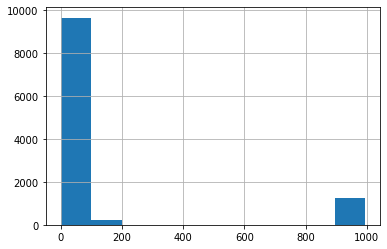

In [48]:
data['TUMOR_SIZE'].hist()

In [49]:
table(data, 'APR')

,counts,percent
0.0,15497,0.953662
1.0,753,0.046338


<AxesSubplot:>

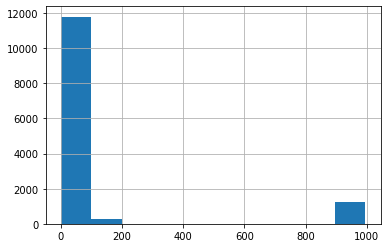

In [50]:
#if TUMOR_SIZE is missing, fill with TUMOR_SIZE_SUMMARY_2016
data.loc[data['TUMOR_SIZE'].isnull(), 'TUMOR_SIZE'] = data.loc[data['TUMOR_SIZE'].isnull(), 'TUMOR_SIZE_SUMMARY_2016']
data['TUMOR_SIZE'].hist()


<AxesSubplot:>

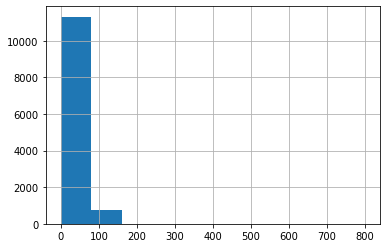

In [51]:
data.loc[data['TUMOR_SIZE'] > 800, 'TUMOR_SIZE'] = np.NaN
data['TUMOR_SIZE'].hist()


<AxesSubplot:>

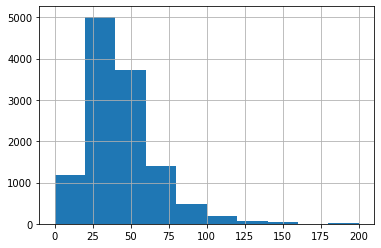

In [52]:
data.loc[data['TUMOR_SIZE'] > 200, 'TUMOR_SIZE'] = 200
data['TUMOR_SIZE'].hist()

In [53]:
data.drop('TUMOR_SIZE_SUMMARY_2016', axis=1, inplace=True)

In [54]:
table(data, 'APR')

,counts,percent
0.0,15497,0.953662
1.0,753,0.046338


In [55]:
data_tumor_size = data[data['TUMOR_SIZE'].notnull()]
table(data_tumor_size, 'APR')

,counts,percent
0.0,11482,0.948769
1.0,620,0.051231


In [56]:
data.shape

(16250, 43)

<AxesSubplot:>

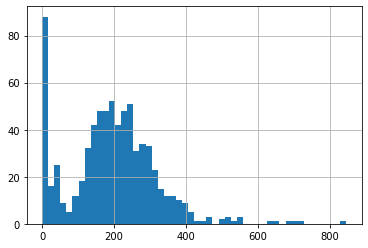

In [57]:
#find the distribution of days between diagnosis and surgery
data['DX_SURG_STARTED_DAYS'].hist(bins=50)

In [58]:
data['DX_SURG_STARTED_DAYS'].quantile(0.9)

330.1

<AxesSubplot:>

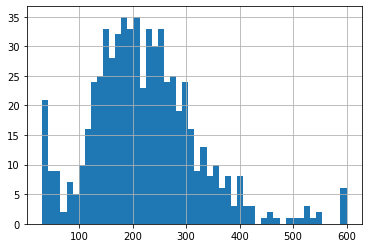

In [59]:
data.loc[data['DX_SURG_STARTED_DAYS'] <30, 'DX_SURG_STARTED_DAYS'] = np.NaN
data.loc[data['DX_SURG_STARTED_DAYS'] > 600, 'DX_SURG_STARTED_DAYS'] = 600

data['DX_SURG_STARTED_DAYS'].hist(bins=50)

In [60]:
data['rad_end'] = data['RAD_ELAPSED_RX_DAYS'] + data['DX_RAD_STARTED_DAYS']

<AxesSubplot:>

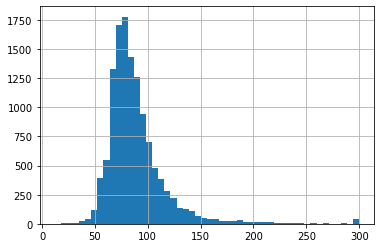

In [61]:
data.loc[data['rad_end'] > 300, 'rad_end'] = 300
data['rad_end'].hist(bins=50)

<AxesSubplot:>

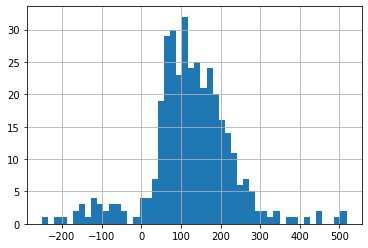

In [62]:
data['surg_rad_days'] = data['DX_SURG_STARTED_DAYS'] - data['rad_end']
data['surg_rad_days'].hist(bins=50)

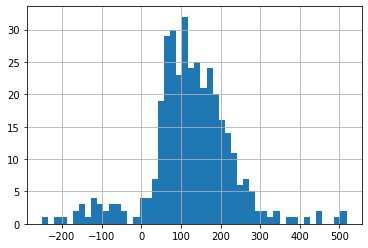

In [63]:
data_apr = data[data['APR'] == 1]
data_apr['surg_rad_days'].hist(bins=50)
#save the figure
plt.savefig('results/surg_rad_days.png', bbox_inches='tight')

In [64]:
data.drop(columns=['surg_rad_days', 'rad_end'], inplace=True)

<AxesSubplot:>

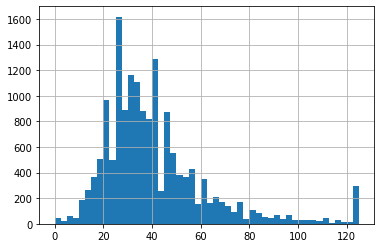

In [65]:
data.loc[data['DX_RAD_STARTED_DAYS'] > 700, 'DX_RAD_STARTED_DAYS'] = np.NaN
data.loc[data['DX_RAD_STARTED_DAYS'] > 125, 'DX_RAD_STARTED_DAYS'] = 125
data['DX_RAD_STARTED_DAYS'].hist(bins=50)

<AxesSubplot:>

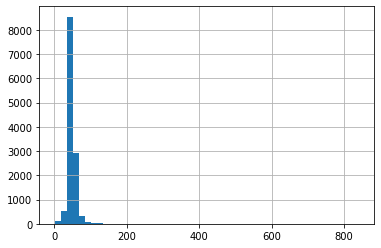

In [66]:
data['RAD_ELAPSED_RX_DAYS'].hist(bins=50)

<AxesSubplot:>

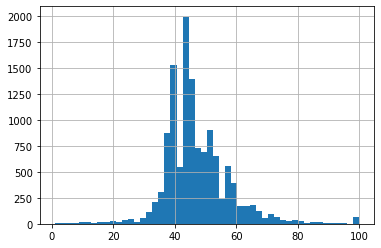

In [67]:
data.loc[data['RAD_ELAPSED_RX_DAYS'] > 700, 'RAD_ELAPSED_RX_DAYS'] = np.NaN
data.loc[data['RAD_ELAPSED_RX_DAYS'] > 100, 'RAD_ELAPSED_RX_DAYS'] = 100
data['RAD_ELAPSED_RX_DAYS'].hist(bins=50)

In [68]:
rad_cols = ['RAD_LOCATION_OF_RX', 'REASON_FOR_NO_RADIATION', 'RX_SUMM_SURGRAD_SEQ']

chemo_cols = ['DX_CHEMO_STARTED_DAYS', 'RX_SUMM_SYSTEMIC_SUR_SEQ']

surg_cols = ['PALLIATIVE_CARE', 'DX_SURG_STARTED_DAYS', 'RX_SUMM_SURG_PRIM_SITE', 'RX_SUMM_SURGICAL_MARGINS', 'SURG_DISCHARGE_DAYS', 'READM_HOSP_30_DAYS', 'REASON_FOR_NO_SURGERY']

In [69]:
#drop all columns related to the treatment
for x in rad_cols:
    try:
        data.drop(x, axis=1, inplace=True)
    except KeyError:
        pass
for x in surg_cols:
    try:
        data.drop(x, axis=1, inplace=True)
    except KeyError:
        pass
for x in os_cols:
    try:
        data.drop(x, axis=1, inplace=True)
    except KeyError:
        pass
for x in chemo_cols:
    try:
        data.drop(x, axis=1, inplace=True)
    except KeyError:
        pass

In [70]:
#find the columns with the greatest proportion of missing values
missing_values = data.isnull().sum()
pd.DataFrame(missing_values.sort_values(ascending=False)).head(20)


,0
GRADE_CLIN,15943
"Radiation Dose, >30 Gy",9405
TOTAL_DOSE,9405
LYMPH_VASCULAR_INVASION,4712
TUMOR_SIZE,4148
RAD_ELAPSED_RX_DAYS,3683
MED_INC_QUAR_2016,1832
NO_HSD_QUAR_2016,1807
CROWFLY,1640
UR_CD_13,458


In [71]:
data['GRADE'].value_counts(dropna=False)

2.0    5396
9.0    4937
3.0    4519
1.0     996
NaN     307
4.0      95
Name: GRADE, dtype: int64

In [72]:
data['GRADE'] = data['GRADE'].astype(str)
data['GRADE_CLIN'] = data['GRADE_CLIN'].astype(str)
data.loc[data['GRADE'] == 'nan', 'GRADE'] = data.loc[data['GRADE'] == 'nan', 'GRADE_CLIN']
data.loc[data['GRADE'].str.contains('1'), 'GRADE'] = '1.0'
data.loc[data['GRADE'].str.contains('2'), 'GRADE'] = '2.0'
data.loc[data['GRADE'].str.contains('3'), 'GRADE'] = '3.0'
data.loc[data['GRADE'].str.contains('4'), 'GRADE'] = '4.0'
data['GRADE'].value_counts(dropna=False)


2.0    5506
9.0    4937
3.0    4583
1.0    1020
9       103
4.0      95
H         6
Name: GRADE, dtype: int64

In [73]:
drop = ['GRADE_CLIN']
data.drop(drop, axis=1, inplace=True)

In [74]:
len(data['YEAR_OF_DIAGNOSIS'].unique())

16

In [75]:
facility_by_year = pd.DataFrame(pd.crosstab(data['PUF_FACILITY_ID'], data['YEAR_OF_DIAGNOSIS'], margins=True))
facility_counts = pd.DataFrame(facility_by_year['All'])
#drop the last row, which is the total
facility_counts.drop(facility_counts.tail(1).index, inplace=True)

In [76]:
facility_by_year = pd.DataFrame(pd.crosstab(data['PUF_FACILITY_ID'], data['YEAR_OF_DIAGNOSIS']))
facility_by_year['num_zero'] = 1000
for i,row in facility_by_year.iterrows():
    try:
        row['num_zero'] = pd.DataFrame(facility_by_year.loc[i].value_counts()).loc[0][0]
    except KeyError:
        row['num_zero'] = 0

In [77]:
facility_by_year['num_zero'] = 16 - facility_by_year['num_zero']

facility_by_year.head()

YEAR_OF_DIAGNOSIS,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,num_zero
PUF_FACILITY_ID,,,,,,,,,,,,,,,,,
ABZFZYJZCA,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2
ADSHBUUWZC,0,0,1,0,1,1,2,2,1,2,0,0,1,0,0,0,8
ADXGCKXJNR,0,0,0,0,0,0,0,4,2,5,3,2,1,4,0,0,7
ADXQMZWWTZ,0,1,1,1,1,1,2,0,0,3,1,0,0,0,1,0,9
AEFZNJSMJI,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,3


In [78]:
facility_counts['num_zero'] = facility_by_year['num_zero']
facility_counts.head()

,All,num_zero
PUF_FACILITY_ID,,
ABZFZYJZCA,2,2
ADSHBUUWZC,11,8
ADXGCKXJNR,21,7
ADXQMZWWTZ,12,9
AEFZNJSMJI,4,3


In [79]:
facility_counts['norm'] = facility_counts['All'] / facility_counts['num_zero']
facility_counts.head()

,All,num_zero,norm
PUF_FACILITY_ID,,,
ABZFZYJZCA,2,2,1.000000
ADSHBUUWZC,11,8,1.375000
ADXGCKXJNR,21,7,3.000000
ADXQMZWWTZ,12,9,1.333333
AEFZNJSMJI,4,3,1.333333


In [80]:
facility_counts['norm'].describe()

count    1207.000000
mean        1.709905
std         0.943444
min         1.000000
25%         1.125000
50%         1.461538
75%         1.964286
max        14.416667
Name: norm, dtype: float64

In [81]:
fac_ids = facility_counts.index.to_list()
len(fac_ids)

1207

In [82]:
fac_ids1 = fac_ids[:len(fac_ids)//4]
fac_ids2 = fac_ids[(len(fac_ids)//4):((len(fac_ids)//4)*2)]
fac_ids3 = fac_ids[((len(fac_ids)//4) * 2):((len(fac_ids)//4)*3)]
fac_ids4 = fac_ids[((len(fac_ids)//4) * 3):]

data['facs_quart_norm'] = np.NaN
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids1), 'facs_quart_norm'] = 1
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids2), 'facs_quart_norm'] = 2
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids3), 'facs_quart_norm'] = 3
data.loc[data['PUF_FACILITY_ID'].isin(fac_ids4), 'facs_quart_norm'] = 4
data['facs_quart_norm'].value_counts(dropna=False)

4.0    4486
3.0    4105
1.0    3949
2.0    3710
Name: facs_quart_norm, dtype: int64

In [83]:
facs = pd.DataFrame(data['PUF_FACILITY_ID'].value_counts()).index.to_list()
len(facs)

1207

In [84]:
facs1 = facs[:len(facs)//4]
facs2 = facs[(len(facs)//4):((len(facs)//4)*2)]
facs3 = facs[((len(facs)//4) * 2):((len(facs)//4)*3)]
facs4 = facs[((len(facs)//4) * 3):]

data['facs_quart'] = np.NaN
data.loc[data['PUF_FACILITY_ID'].isin(facs1), 'facs_quart'] = 1
data.loc[data['PUF_FACILITY_ID'].isin(facs2), 'facs_quart'] = 2
data.loc[data['PUF_FACILITY_ID'].isin(facs3), 'facs_quart'] = 3
data.loc[data['PUF_FACILITY_ID'].isin(facs4), 'facs_quart'] = 4
data['facs_quart'].value_counts(dropna=False)

1.0    9772
2.0    3837
3.0    1943
4.0     698
Name: facs_quart, dtype: int64

In [85]:
corr = data['facs_quart'].corr(data['APR'])
corr_norm = data['facs_quart_norm'].corr(data['APR'])
print(corr, corr_norm)

0.023576675280162468 -0.007743424600213395


In [86]:
data.drop(['facs_quart_norm'], axis=1, inplace=True)

In [87]:
data.drop('PUF_FACILITY_ID', axis=1, inplace=True)

In [88]:
#find columns with data type object
cat_cols = data.select_dtypes(include=['object']).columns.to_list()
cat_cols

['PUF_CASE_ID', 'GRADE', 'stage', 't_stage', 'n_stage', 'm_stage']

In [89]:
data.set_index('PUF_CASE_ID', inplace=True)

In [90]:
cat_cols.remove('PUF_CASE_ID')
data.head()

,FACILITY_TYPE_CD,FACILITY_LOCATION_CD,AGE,SEX,RACE,SPANISH_HISPANIC_ORIGIN,INSURANCE_STATUS,UR_CD_13,CROWFLY,CDCC_TOTAL_BEST,...,MED_INC_QUAR_2016,PUF_MEDICAID_EXPN_CODE,TOTAL_DOSE,APR,"Radiation Dose, >30 Gy",stage,t_stage,n_stage,m_stage,facs_quart
PUF_CASE_ID,,,,,,,,,,,,,,,,,,,,,
D66f458f9-bdc0-4c95-94a3-a5f8c5bb74f9,3.0,5.0,52,2,1.0,0,0,2.0,3.6,0,...,1.0,0,0.0,0.0,0.0,2A,2,0,0,1.0
Dfc68ea23-71aa-4b0d-87c0-587b4ce13d04,3.0,9.0,49,2,1.0,0,1,1.0,11.4,0,...,3.0,2,NaN,0.0,NaN,3A,2,1,0,1.0
D6a94c44a-86b9-4b34-8f6b-bcc0da65cc59,4.0,9.0,53,2,1.0,0,3,5.0,NaN,3,...,NaN,2,NaN,0.0,NaN,2B,3,0,0,1.0
D9733f795-06f9-44bd-a94c-cfff0110c969,1.0,7.0,53,2,1.0,0,1,3.0,3.9,0,...,3.0,3,5400.0,0.0,1.0,3C,3,1,0,4.0
D8b728962-841e-4e24-85b4-edd6b2ea6c94,1.0,9.0,46,1,1.0,0,1,1.0,19.8,0,...,4.0,2,NaN,0.0,NaN,3A,1,1,0,2.0


In [91]:
data.shape

(16250, 28)

In [92]:
data.to_csv('data/table1_data.csv', index_label='Case Key')
